In [4]:
import laspy
import matplotlib.pyplot as plt
import numpy as np


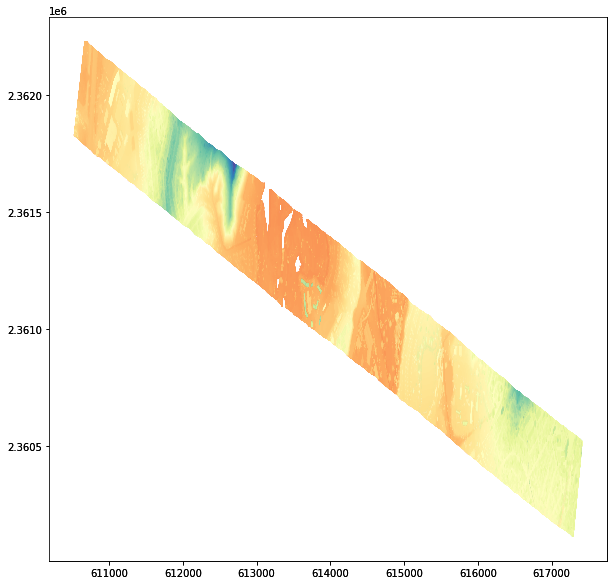

In [5]:
inFile = laspy.read("data/ldr100908_123219_1.las")

%matplotlib inline
fig = plt.figure(figsize=[10, 10])

sc = plt.plot(inFile.x, inFile.y)

ax = plt.axes(projection=None)
sc = ax.scatter(inFile.x, inFile.y, s=0.1, c=inFile.z, marker='o', cmap="Spectral")

plt.show(sc)

In [6]:
count = 0
fullcount = 0
points = 0
with open('data/ldr100908_123219_1.dxf', mode='r') as file:
  buff = file.read()
  linecount = buff.count('POINT')

# This is only a demo of the DXF file
PointsXY = np.empty((linecount, 2))

blnLine = False
rowcount = 0
xrow = 0
count = 0

with open('data/ldr100908_123219_1.dxf', mode='r') as file:
  for line in file:
    var_exists = 'POINT' in line

    if(var_exists):
      incnt = 0
      blnLine = True

    if(blnLine):
      if(incnt == 6): # Start X
        xrow = rowcount
        sxpt = float(line)
      if(incnt == 8): # Start Y
        sypt = float(line)
        newrow = [sxpt, sypt]
        PointsXY[count] = newrow

        count += 1
        blnLine = False
      incnt += 1
    rowcount += 1

print(len(PointsXY))

68575


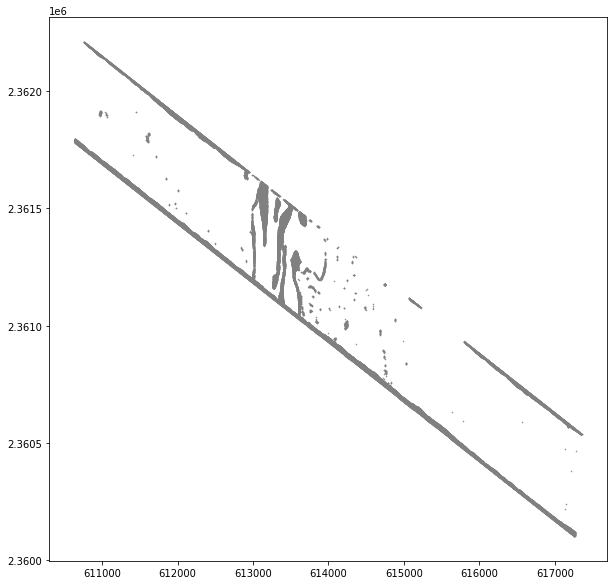

In [8]:
%matplotlib inline
fig = plt.figure(figsize=[10, 10])

for i in range(0,len(PointsXY)):
  row = PointsXY[i]
  xrow = [row[0]]
  yrow = [row[1]]
  sc = plt.plot(xrow, yrow, color='grey', marker='.', markersize=1)

plt.show(sc)

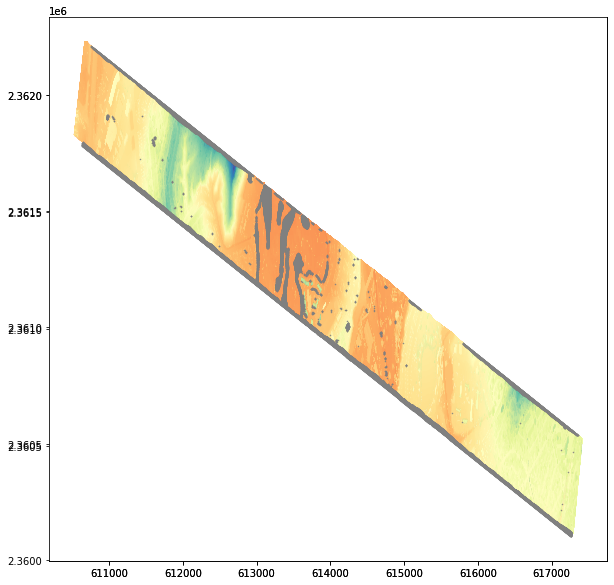

In [10]:
inFile = laspy.read("data/ldr100908_123219_1.las")

%matplotlib inline
fig = plt.figure(figsize=[10, 10])

sc = plt.plot(inFile.x, inFile.y)

ax = plt.axes(projection=None)
sc = ax.scatter(inFile.x, inFile.y, s=0.1, c=inFile.z, marker='o', cmap="Spectral")

for i in range(0,len(PointsXY)):
  row = PointsXY[i]
  xrow = [row[0]]
  yrow = [row[1]]
  sc = plt.plot(xrow, yrow, color='grey', marker='.', markersize=1)

plt.show(sc)